In [59]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
rng = np.random.default_rng(seed=0)
r = 0.42
p = 2/10  #t/l
NUM_SAMPLES = 100_000_000




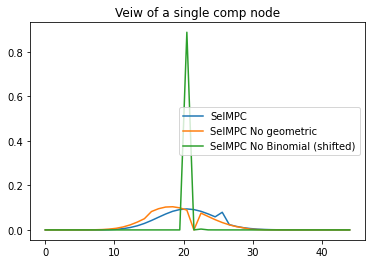

In [61]:
'''Plot the distribution assuming ground truth of 100 keys with the two one sided distributions'''

value = 100
geo = value + rng.geometric(r, size=NUM_SAMPLES) - 1
selected = rng.binomial(geo, p)
true_selected = rng.binomial([100]*NUM_SAMPLES, p)-1

geo_side = geo * 2/10

def get_hist(samples):
    hist = np.histogram(samples, bins=44)
    return scipy.stats.rv_histogram(hist)


X = np.linspace(0, 44.0, 44 )
plt.title("Veiw of a single comp node")
selmpc = get_hist(selected)
plt.plot(X, selmpc.pdf(X), label='SelMPC')

selmpc2 = get_hist(true_selected)
plt.plot(X, selmpc2.pdf(X), label='SelMPC No geometric')

selmpc3 = get_hist(geo_side)
plt.plot(X, selmpc3.pdf(X), label='SelMPC No Binomial (shifted)')

plt.legend()
plt.show()

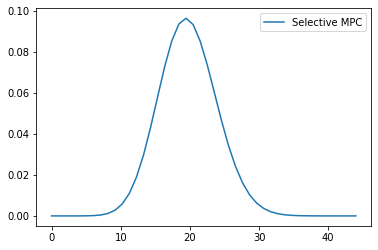

In [60]:
'''Plot the distribution assuming ground truth of 100 keys'''

value = 100
geo = value + rng.geometric(r, size=NUM_SAMPLES) - 1
selected = rng.binomial(geo, p)

def get_hist(samples):
    hist = np.histogram(samples, bins=44)
    return scipy.stats.rv_histogram(hist)


X = np.linspace(0, 44.0, 44 )
#plt.title("Veiw of a single comp node")
selmpc = get_hist(selected)
plt.plot(X, selmpc.pdf(X), label='Selective MPC')

plt.legend()
plt.savefig('sel_mpc.png', bbox_inches='tight', dpi=600)
plt.show()

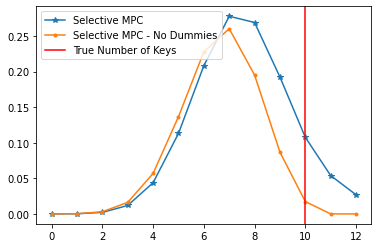

In [62]:
'''Plot the distribution assuming ground truth of 10 keys to show the delta tail'''

value = 10
p=2/3
r=0.4
geo = value + rng.geometric(r, size=NUM_SAMPLES) - 1
selected = rng.binomial(geo, p)

def get_hist(samples):
    hist = np.histogram(samples, bins=44)
    return scipy.stats.rv_histogram(hist)


X = list(range(13))
#plt.title("Veiw of 10 keys for a single comp node. p=2/3 r=0.4")
selmpc = get_hist(selected)
plt.plot(X, selmpc.pdf(X), label='Selective MPC', marker='*')

from math import comb
def binomial_pdf(x, a=10, p=2/3):
    if x > a:
        return 0
    else:
        choose = comb(a,x)
        return choose * (p ** x) * ((1-p) ** (a-x))


true_binomial = [binomial_pdf(x) for x in X]
plt.plot(X, true_binomial, label='Selective MPC - No Dummies', marker='.')
plt.axvline(x=10, color='red',label='True Number of Keys')
plt.legend()
plt.savefig('sel_MPC_no_geo.png', bbox_inches='tight',dpi=600)
plt.show()